# Model validation the wrong way

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [9]:
iris= load_iris()
iris.data.shape
iris.target.shape

(150,)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=1)

In [15]:
model.fit(iris.data, iris.target)
y_model = model.predict(iris.data)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, y_model)

1.0

# Model validation the right way: Holdout sets

In [22]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest  = train_test_split(iris.data, iris.target, random_state=0, train_size=0.5)

In [30]:
model.fit(xtrain,ytrain)
y_model = model.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_model, ytest)

0.9066666666666666

## Here we do two validation trials, alternately using each half of the data as a holdout set.

In [34]:
model.fit(xtest, ytest)
y1_model = model.predict(xtrain)
accuracy_score(y1_model, ytrain)

0.96

## Here we do five validation trials

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(model, iris.data, iris.target, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## Here we go very extreme to 150 validation trials for every data point

In [48]:
from sklearn.model_selection import KFold

In [54]:
scores = cross_val_score(model, iris.data, iris.target, cv = KFold(n_splits=150))
scores.mean(dtype='float')

0.96

In [50]:
from sklearn.model_selection import LeaveOneOut

In [4]:
import numpy as np

In [52]:
scores = cross_val_score(model, iris.data, iris.target, cv = LeaveOneOut())
np.mean(scores)

0.96

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [106]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [189]:
def make_data(N, err=1.0):
    X = np.random.rand(N, 1)**2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err>0:
        y += np.random.randn(N)
    return X,y

In [190]:
X, y = make_data(40)

In [168]:
import sys
print(sys.getrecursionlimit())


4000


In [169]:
sys.setrecursionlimit(4000)

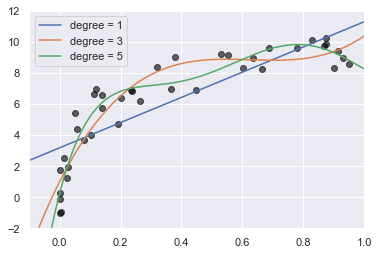

In [170]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, marker='o', facecolor='black',alpha=0.6)
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree = {degree}')
plt.xlim(-0.1, 1)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [171]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)



/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [172]:
train_score.shape

(21, 7)

In [173]:
np.median(train_score, axis=1)  # medians for every 7 scores, there are 21 rows for 21 degree

array([0.        , 0.68577266, 0.83992687, 0.87778586, 0.91227442,
       0.91603042, 0.92668758, 0.92924359, 0.92925382, 0.929744  ,
       0.93389723, 0.93730444, 0.93882181, 0.93928835, 0.93928876,
       0.94751296, 0.94761173, 0.94885288, 0.94921936, 0.95253195,
       0.95704485])

([<matplotlib.axis.XTick at 0x7fd8105ebf10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

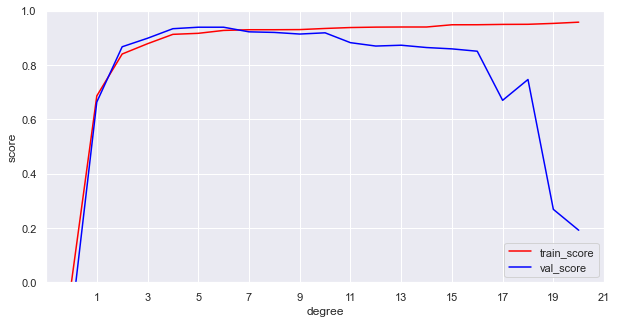

In [174]:
plt.figure(figsize=(10,5))
plt.plot(degree, np.median(train_score, 1), label='train_score', color='red')
plt.plot(degree, np.median(val_score, 1), label='val_score', color='blue')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')
plt.ylim(0,1)
plt.xticks([1,3, 5, 7, 9, 11, 13,15, 17, 19, 21])

(-0.16000000000000003,
 1.1600000000000001,
 -4.329452899503028,
 12.910309953252453)

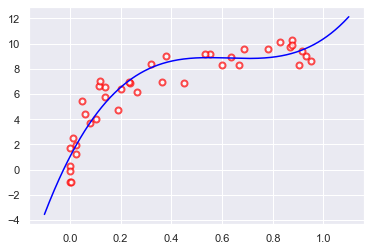

In [175]:
plt.scatter(X.ravel(), y, facecolor='white', marker='o', linewidth=2, edgecolor='red', alpha=0.7)
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test, y_test, color='blue')
plt.axis('tight')

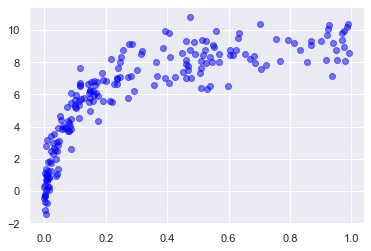

In [176]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2, marker='o', facecolor='blue', alpha=0.5)

In [177]:
from sklearn.model_selection import learning_curve

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


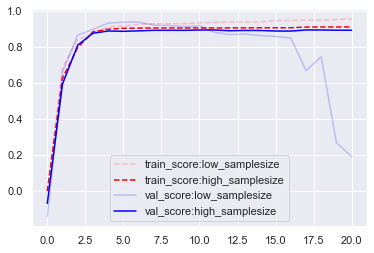

In [178]:
degree = np.arange(0,21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score,1), linestyle='--', color='red', alpha=0.2, label='train_score:low_samplesize')
plt.plot(degree, np.median(train_score2,1), linestyle='--', color='red', label='train_score:high_samplesize')
plt.plot(degree, np.median(val_score,1), linestyle='-', color='blue', alpha = 0.2, label='val_score:low_samplesize')
plt.plot(degree, np.median(val_score2,1), linestyle='-', color='blue', label='val_score:high_samplesize')
plt.legend(loc='best')

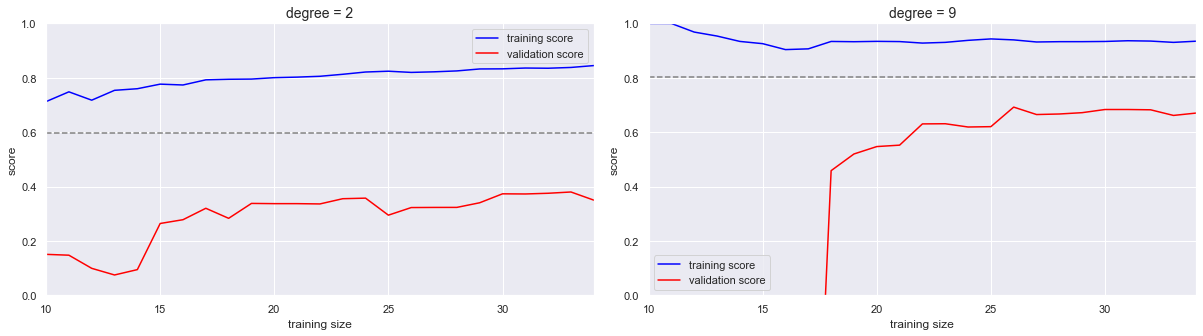

In [179]:

fig,ax = plt.subplots(1, 2, figsize=(18, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25)) #the train_sizes statement will give the range of dataset N

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score') 
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',linestyle='dashed')
    ax[i].set_ylim(0, 1) 
    ax[i].set_xlim(N[0], N[-1]) 
    ax[i].set_xlabel('training size') 
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [184]:
from sklearn.model_selection import GridSearchCV

In [195]:
param = {'polynomialfeatures__degree':np.arange(21), 
        'linearregression__fit_intercept':[True, False],
        'linearregression__normalize':[True, False]}

In [196]:
grid = GridSearchCV(PolynomialRegression(), param, cv=7)

In [198]:
grid.fit(X, y)
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 4}

In [200]:
model = grid.best_estimator_

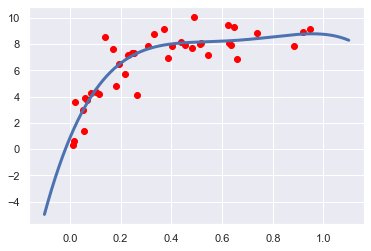

In [203]:
plt.scatter(X.ravel(), y, facecolor='red')
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, linewidth=3)